## Random Forest Classification - Ensemble (Bagging)

 #### Create multiple tree in parallel and takes voting at end 

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Step 1 :  Read the Train dataset 

import pandas as pd 
df = pd.read_csv('train_titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#n Step 2 Perform Basic Data Quality cheks 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
m = df.isna().sum()
m[m>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
# step 3 Seperate X and Y (Surived)

In [12]:
X = df.drop(columns=['PassengerId','Name','Ticket','Cabin','Survived'])
Y = df[['Survived']]

In [13]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [14]:
X.shape

(891, 7)

In [15]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [16]:
Y.shape

(891, 1)

<Axes: xlabel='Survived'>

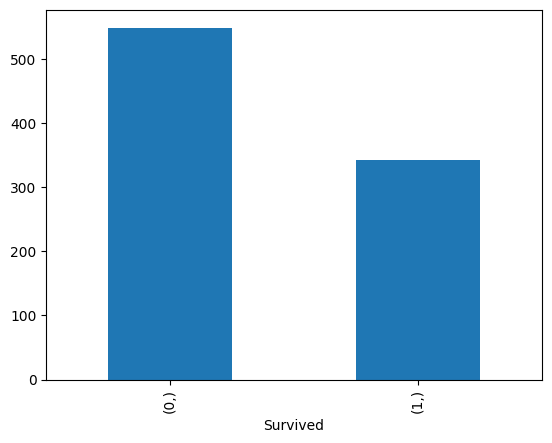

In [20]:
Y.value_counts().plot(kind='bar')

In [21]:
# step 4 Seperate cat and con features fromm X 

In [22]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [23]:
cat

['Sex', 'Embarked']

In [24]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [26]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

In [27]:
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output= False))])

In [29]:
pre = ColumnTransformer([('num',num_pipe,con),
                          ('cat',cat_pipe,cat)]).set_output(transform='pandas')

In [30]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Embarked'])])

In [31]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [32]:
# step 5 Apply Train Test split 

In [33]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrian,ytest =train_test_split(X_pre,Y,test_size=0.2,random_state=21)


In [34]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
793,-1.566107,-0.104637,-0.474545,-0.473674,-0.030371,0.0,1.0,1.0,0.0,0.0
23,-1.566107,-0.104637,-0.474545,-0.473674,0.066360,0.0,1.0,0.0,0.0,1.0
97,-1.566107,-0.488887,-0.474545,0.767630,0.627278,0.0,1.0,1.0,0.0,0.0
9,-0.369365,-1.180535,0.432793,-0.473674,-0.042956,1.0,0.0,1.0,0.0,0.0
157,0.827377,0.049062,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [35]:
ytrian.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [36]:
xtrain.shape

(712, 10)

In [37]:
ytest.shape

(179, 1)

In [38]:
# Model building (Random Forest)

In [39]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=1,
                                max_depth=1,
                                min_samples_split=5,
                                min_samples_leaf=5,
                                criterion='entropy')
model1.fit(xtrain,ytrian)

RandomForestClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=1)

In [40]:
# Accuracy in train 
model1.score(xtrain,ytrian)

0.7879213483146067

In [41]:
# Accuracy in test 
model1.score(xtest,ytest)

0.7821229050279329

### Hyperparameter tuning

In [42]:
params1 = {'n_estimators':[10,50,100,200,300],
           'max_depth':[2,3,4,5],
           'min_samples_split':[5,6,7,8],
           'criterion':['gini','entropy']}

In [ ]:
# Randomize search is faster than gridsearch 
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()



In [43]:
# Randomize search is faster than gridsearch 
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
rscv1 =RandomizedSearchCV(rfc,param_distributions=params1,cv=5,scoring='f1_macro')
rscv1.fit(xtrain,ytrian)



RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5],
                                        'min_samples_split': [5, 6, 7, 8],
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   scoring='f1_macro')

In [44]:
rscv1.best_params_

{'n_estimators': 50,
 'min_samples_split': 7,
 'max_depth': 5,
 'criterion': 'entropy'}

In [45]:
rscv1.best_score_

0.802330288213987

In [46]:
best_rfc = rscv1.best_estimator_
best_rfc

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=7,
                       n_estimators=50)

In [47]:
best_rfc.score(xtrain,ytrian)

0.8539325842696629

In [48]:
best_rfc.score(xtest,ytest)

0.8212290502793296

### Predict results for random forest

In [49]:
ypred_train1 =best_rfc.predict(xtrain)
ypred_test1 = best_rfc.predict(xtest)

In [50]:
ypred_train1[0:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [51]:
ytrian.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [52]:
ypred_test1[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [53]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


### plot confusion matrix for random forest

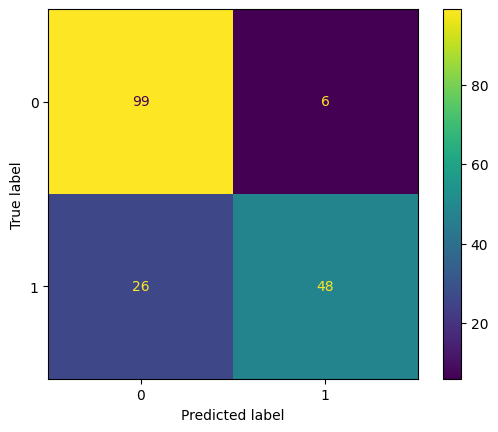

In [54]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf1 = confusion_matrix(ytest,ypred_test1)
cfd1 = ConfusionMatrixDisplay(cf1,display_labels=best_rfc.classes_)
cfd1.plot()

### Print classification report for random forest

In [55]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test1))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       105
           1       0.89      0.65      0.75        74

    accuracy                           0.82       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.83      0.82      0.82       179



## Gradient Boosting model

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier(learning_rate=0.1,
                                    n_estimators=1,
                                    max_depth=1,
                                    min_samples_split=5,
                                    min_samples_leaf=5)
model2.fit(xtrain,ytrian)

GradientBoostingClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=5,
                           n_estimators=1)

In [59]:
model2.score(xtrain,ytrian)

0.6235955056179775

In [60]:
model2.score(xtest,ytest)

0.5865921787709497

### Hyperparameter tuning with Randomised search CV


In [61]:
params2 ={'learning_rate':[0.001,0.1,0.15,0.2],
          'n_estimators':[10,50,100,200,300],
          'max_depth':[2,3,4,5],
          'min_samples_split':[5,6,7,8,9]}

In [62]:
gbc = GradientBoostingClassifier()
rscv2 = RandomizedSearchCV(gbc,param_distributions=params2,scoring='f1_macro')
rscv2.fit(xtrain,ytrian)

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.001, 0.1, 0.15,
                                                          0.2],
                                        'max_depth': [2, 3, 4, 5],
                                        'min_samples_split': [5, 6, 7, 8, 9],
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   scoring='f1_macro')

In [63]:
rscv2.best_params_

{'n_estimators': 50,
 'min_samples_split': 8,
 'max_depth': 4,
 'learning_rate': 0.2}

In [64]:
rscv2.best_score_

0.8055064389044052

In [65]:
best_gbc = rscv2.best_estimator_
best_gbc

GradientBoostingClassifier(learning_rate=0.2, max_depth=4, min_samples_split=8,
                           n_estimators=50)

### Evaluate Gradient boosting classifer


In [66]:
best_gbc.score(xtrain,ytrian)

0.9367977528089888

In [67]:
best_gbc.score(xtest,ytest)

0.8324022346368715

### Predict results for train and test 

In [68]:
ypred_train2 = best_gbc.predict(xtrain)
ypred_test2 = best_gbc.predict(xtest)

In [69]:
ypred_test2[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [70]:
ytrian.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [71]:
ypred_test2[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [72]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


### Plot confusion matrix for gradient boosting 

In [78]:
display_labels = best_gbc.classes_
display_labels

array([0, 1], dtype=int64)

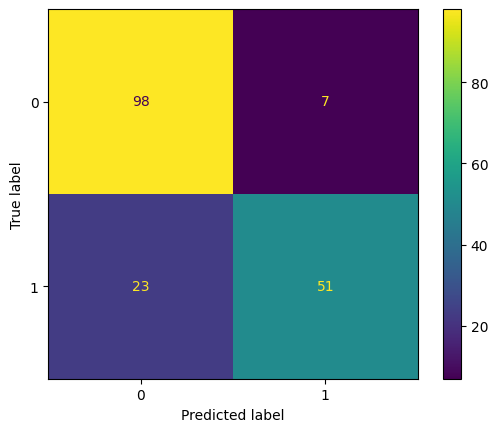

In [80]:
cf2 = confusion_matrix(ytest,ypred_test2)
cfd2 = ConfusionMatrixDisplay(cf2,display_labels=best_gbc.classes_)
cfd2.plot()

### print classification report for gradient boosting 

In [81]:
print(classification_report(ytest,ypred_test2))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       105
           1       0.88      0.69      0.77        74

    accuracy                           0.83       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.83      0.83       179



### Gradient bossting is slightly better than random forest 

#### use gradient boosting for out of samples predictions

In [82]:
xnew = pd.read_csv('test_titanic.csv')
xnew

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [83]:
xnew_pre = pre.transform(xnew)
xnew_pre

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,1.0,0.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,1.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,1.0,0.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
413,0.827377,-0.104637,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0
414,-1.566107,0.740711,-0.474545,-0.473674,1.544246,1.0,0.0,1.0,0.0,0.0
415,0.827377,0.702286,-0.474545,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
416,0.827377,-0.104637,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


#### Get the prediction with gradient boosting 

In [84]:
preds = best_gbc.predict(xnew_pre)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [85]:
probs = best_gbc.predict_proba(xnew_pre)
probs[0:5]

array([[0.94701893, 0.05298107],
       [0.52071247, 0.47928753],
       [0.80776891, 0.19223109],
       [0.87322112, 0.12677888],
       [0.61883675, 0.38116325]])

In [86]:
best_gbc.classes_

array([0, 1], dtype=int64)

In [87]:
prob_sur = probs[:,1]
prob_sur[0:5]

array([0.05298107, 0.47928753, 0.19223109, 0.12677888, 0.38116325])

### Save above results to dataframe 

In [89]:
df_results = xnew[['PassengerId']]
df_results

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [90]:
df_results['Survived_pred']=preds
df_results['probability_survival']=prob_sur

In [91]:
df_results

,PassengerId,Survived_pred,probability_survival
0,892,0,0.052981
1,893,0,0.479288
2,894,0,0.192231
3,895,0,0.126779
4,896,0,0.381163
...,...,...,...
413,1305,0,0.073358
414,1306,1,0.971308
415,1307,0,0.037303
416,1308,0,0.073358


In [92]:
df_results['Survived_pred'].value_counts()

Survived_pred
0    287
1    131
Name: count, dtype: int64

<Axes: xlabel='Survived_pred'>

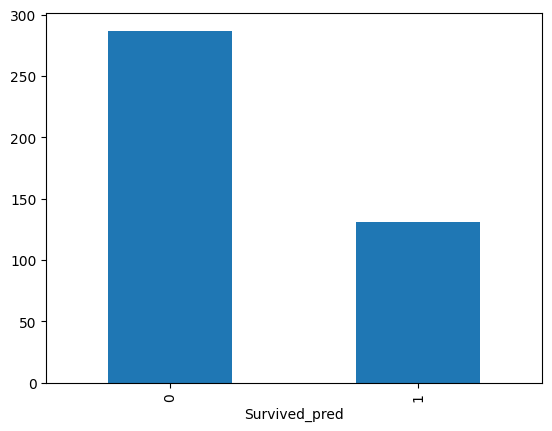

In [93]:
df_results['Survived_pred'].value_counts().plot(kind='bar')

## save above results to csv

In [94]:
df_results.to_csv('GradientReasults.csv',index=False)